In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('data/micro_sud3_normalized.pkl')
df = df.reset_index()


def split_dataframe(dataframe, percent):
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]

def dataframe_to_xy(df):
    return (np.array(df[['NO2_61FD', 'NO2_61F0', 'NO2_61EF', 'temp', 'rh',\
                         'tgrad', 'pressure', 'pluvio']]),\
            np.array(df['NO2_ref']))

        
df_train, df_test = split_dataframe(df, 0.5) 
df_valid, df_test = split_dataframe(df_test, 0.5)

X_train, y_train = dataframe_to_xy(df_train)
X_valid, y_valid = dataframe_to_xy(df_valid)
X_test, y_test = dataframe_to_xy(df_test)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_valid= X_valid.reshape((X_valid.shape[0], 1,  X_valid.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

def dataframe_to_xy_sequences(df, sequence_size):
    out_X = np.zeros((len(df)//sequence_size, sequence_size, 8))
    out_y = np.zeros((len(df)//sequence_size, sequence_size))
    i = 0
    while i + sequence_size < len(df):
        sequence = df.iloc[i:i+sequence_size]
        out_X[i//sequence_size] =  np.array(sequence[['NO2_61FD', 'NO2_61F0', 'NO2_61EF', 'temp', 'rh',\
                                 'tgrad', 'pressure', 'pluvio']])
        out_y[i//sequence_size] = np.array(sequence['NO2_ref'])
        i += sequence_size
        
    return out_X, out_y

In [3]:
from keras.layers import SimpleRNN, Dense, LSTM, GRU
from keras.models import Sequential
from keras.callbacks import EarlyStopping

def simple_rnn_model(nb_units, input_dim, loss='mean_squared_error', optimizer='adam'):
    model = Sequential()
    model.add(SimpleRNN(nb_units, input_shape=input_dim))#input_dim=input_dim[1], input_length=input_dim[0], return_sequences=True))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

def lstm_model(nb_units, input_dim, loss='mean_squared_error', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(nb_units, input_shape=input_dim))#input_dim=input_dim[1], input_length=input_dim[0], return_sequences=True))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

def gru_model(nb_units, input_dim, loss='mean_squared_error', optimizer='adam'):
    model = Sequential()
    model.add(GRU(nb_units, input_shape=input_dim))#input_dim=input_dim[1], input_length=input_dim[0], return_sequences=True))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

Using TensorFlow backend.


In [4]:
model = simple_rnn_model(16, X_train.shape[1:])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 16)                400       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


In [5]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=10000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1, shuffle=False)

Train on 1126 samples, validate on 563 samples
Epoch 1/10000
1126/1126 [==============================] - 0s - loss: 3345.3665 - val_loss: 3000.6542
Epoch 2/10000
1126/1126 [==============================] - 0s - loss: 3335.4432 - val_loss: 2992.5543
Epoch 3/10000
1126/1126 [==============================] - 0s - loss: 3324.1375 - val_loss: 2982.5554
Epoch 4/10000
1126/1126 [==============================] - 0s - loss: 3309.7235 - val_loss: 2969.8108
Epoch 5/10000
1126/1126 [==============================] - 0s - loss: 3291.4970 - val_loss: 2953.8971
Epoch 6/10000
1126/1126 [==============================] - 0s - loss: 3269.2219 - val_loss: 2934.6130
Epoch 7/10000
1126/1126 [==============================] - 0s - loss: 3242.8415 - val_loss: 2911.8926
Epoch 8/10000
1126/1126 [==============================] - 0s - loss: 3212.4411 - val_loss: 2885.7299
Epoch 9/10000
1126/1126 [==============================] - 0s - loss: 3178.2003 - val_loss: 2856.2167
Epoch 10/10000
1126/1126 [=========

1126/1126 [==============================] - 0s - loss: 1234.9731 - val_loss: 1067.3998
Epoch 81/10000
1126/1126 [==============================] - 0s - loss: 1222.0838 - val_loss: 1057.0542
Epoch 82/10000
1126/1126 [==============================] - 0s - loss: 1209.3574 - val_loss: 1046.8789
Epoch 83/10000
1126/1126 [==============================] - 0s - loss: 1196.7922 - val_loss: 1036.8673
Epoch 84/10000
1126/1126 [==============================] - 0s - loss: 1184.3854 - val_loss: 1027.0124
Epoch 85/10000
1126/1126 [==============================] - 0s - loss: 1172.1336 - val_loss: 1017.3080
Epoch 86/10000
1126/1126 [==============================] - 0s - loss: 1160.0326 - val_loss: 1007.7471
Epoch 87/10000
1126/1126 [==============================] - 0s - loss: 1148.0776 - val_loss: 998.3230
Epoch 88/10000
1126/1126 [==============================] - 0s - loss: 1136.2636 - val_loss: 989.0287
Epoch 89/10000
1126/1126 [==============================] - 0s - loss: 1124.5857 - val_los

1126/1126 [==============================] - 0s - loss: 511.6430 - val_loss: 462.4276
Epoch 161/10000
1126/1126 [==============================] - 0s - loss: 505.9703 - val_loss: 457.7967
Epoch 162/10000
1126/1126 [==============================] - 0s - loss: 500.3784 - val_loss: 453.2528
Epoch 163/10000
1126/1126 [==============================] - 0s - loss: 494.8670 - val_loss: 448.7951
Epoch 164/10000
1126/1126 [==============================] - 0s - loss: 489.4353 - val_loss: 444.4225
Epoch 165/10000
1126/1126 [==============================] - 0s - loss: 484.0831 - val_loss: 440.1340
Epoch 166/10000
1126/1126 [==============================] - 0s - loss: 478.8096 - val_loss: 435.9284
Epoch 167/10000
1126/1126 [==============================] - 0s - loss: 473.6142 - val_loss: 431.8048
Epoch 168/10000
1126/1126 [==============================] - 0s - loss: 468.4963 - val_loss: 427.7625
Epoch 169/10000
1126/1126 [==============================] - 0s - loss: 463.4552 - val_loss: 423.8

1126/1126 [==============================] - 0s - loss: 251.4153 - val_loss: 270.0213
Epoch 241/10000
1126/1126 [==============================] - 0s - loss: 249.7330 - val_loss: 268.6960
Epoch 242/10000
1126/1126 [==============================] - 0s - loss: 248.0700 - val_loss: 267.3815
Epoch 243/10000
1126/1126 [==============================] - 0s - loss: 246.4258 - val_loss: 266.0779
Epoch 244/10000
1126/1126 [==============================] - 0s - loss: 244.7998 - val_loss: 264.7849
Epoch 245/10000
1126/1126 [==============================] - 0s - loss: 243.1916 - val_loss: 263.5028
Epoch 246/10000
1126/1126 [==============================] - 0s - loss: 241.6007 - val_loss: 262.2315
Epoch 247/10000
1126/1126 [==============================] - 0s - loss: 240.0265 - val_loss: 260.9711
Epoch 248/10000
1126/1126 [==============================] - 0s - loss: 238.4688 - val_loss: 259.7218
Epoch 249/10000
1126/1126 [==============================] - 0s - loss: 236.9269 - val_loss: 258.4

1126/1126 [==============================] - 0s - loss: 165.1184 - val_loss: 198.1319
Epoch 321/10000
1126/1126 [==============================] - 0s - loss: 164.4647 - val_loss: 197.5281
Epoch 322/10000
1126/1126 [==============================] - 0s - loss: 163.8124 - val_loss: 196.9300
Epoch 323/10000
1126/1126 [==============================] - 0s - loss: 163.1611 - val_loss: 196.3377
Epoch 324/10000
1126/1126 [==============================] - 0s - loss: 162.5105 - val_loss: 195.7513
Epoch 325/10000
1126/1126 [==============================] - 0s - loss: 161.8604 - val_loss: 195.1710
Epoch 326/10000
1126/1126 [==============================] - 0s - loss: 161.2104 - val_loss: 194.5966
Epoch 327/10000
1126/1126 [==============================] - 0s - loss: 160.5602 - val_loss: 194.0282
Epoch 328/10000
1126/1126 [==============================] - 0s - loss: 159.9098 - val_loss: 193.4659
Epoch 329/10000
1126/1126 [==============================] - 0s - loss: 159.2590 - val_loss: 192.9

1126/1126 [==============================] - 0s - loss: 120.4497 - val_loss: 163.6647
Epoch 401/10000
1126/1126 [==============================] - 0s - loss: 120.0250 - val_loss: 163.3246
Epoch 402/10000
1126/1126 [==============================] - 0s - loss: 119.6021 - val_loss: 162.9856
Epoch 403/10000
1126/1126 [==============================] - 0s - loss: 119.1809 - val_loss: 162.6479
Epoch 404/10000
1126/1126 [==============================] - 0s - loss: 118.7615 - val_loss: 162.3115
Epoch 405/10000
1126/1126 [==============================] - 0s - loss: 118.3441 - val_loss: 161.9765
Epoch 406/10000
1126/1126 [==============================] - 0s - loss: 117.9288 - val_loss: 161.6430
Epoch 407/10000
1126/1126 [==============================] - 0s - loss: 117.5155 - val_loss: 161.3111
Epoch 408/10000
1126/1126 [==============================] - 0s - loss: 117.1045 - val_loss: 160.9808
Epoch 409/10000
1126/1126 [==============================] - 0s - loss: 116.6957 - val_loss: 160.6

1126/1126 [==============================] - 0s - loss: 92.7065 - val_loss: 140.0586
Epoch 481/10000
1126/1126 [==============================] - 0s - loss: 92.4110 - val_loss: 139.7781
Epoch 482/10000
1126/1126 [==============================] - 0s - loss: 92.1164 - val_loss: 139.4979 98.35
Epoch 483/10000
1126/1126 [==============================] - 0s - loss: 91.8229 - val_loss: 139.2179
Epoch 484/10000
1126/1126 [==============================] - 0s - loss: 91.5304 - val_loss: 138.9381
Epoch 485/10000
1126/1126 [==============================] - 0s - loss: 91.2389 - val_loss: 138.6586
Epoch 486/10000
1126/1126 [==============================] - 0s - loss: 90.9485 - val_loss: 138.3795
Epoch 487/10000
1126/1126 [==============================] - 0s - loss: 90.6591 - val_loss: 138.1005
Epoch 488/10000
1126/1126 [==============================] - 0s - loss: 90.3706 - val_loss: 137.8218
Epoch 489/10000
1126/1126 [==============================] - 0s - loss: 90.0832 - val_loss: 137.5434


1126/1126 [==============================] - 0s - loss: 71.8313 - val_loss: 118.0430
Epoch 562/10000
1126/1126 [==============================] - 0s - loss: 71.6362 - val_loss: 117.8114
Epoch 563/10000
1126/1126 [==============================] - 0s - loss: 71.4432 - val_loss: 117.5815
Epoch 564/10000
1126/1126 [==============================] - 0s - loss: 71.2522 - val_loss: 117.3533
Epoch 565/10000
1126/1126 [==============================] - 0s - loss: 71.0632 - val_loss: 117.1267
Epoch 566/10000
1126/1126 [==============================] - 0s - loss: 70.8764 - val_loss: 116.9018
Epoch 567/10000
1126/1126 [==============================] - 0s - loss: 70.6915 - val_loss: 116.6785
Epoch 568/10000
1126/1126 [==============================] - 0s - loss: 70.5087 - val_loss: 116.4570
Epoch 569/10000
1126/1126 [==============================] - 0s - loss: 70.3278 - val_loss: 116.2372
Epoch 570/10000
1126/1126 [==============================] - 0s - loss: 70.1489 - val_loss: 116.0191
Epoch 

1126/1126 [==============================] - 0s - loss: 61.5998 - val_loss: 105.0119
Epoch 643/10000
1126/1126 [==============================] - 0s - loss: 61.5250 - val_loss: 104.9123
Epoch 644/10000
1126/1126 [==============================] - 0s - loss: 61.4510 - val_loss: 104.8137
Epoch 645/10000
1126/1126 [==============================] - 0s - loss: 61.3777 - val_loss: 104.7160
Epoch 646/10000
1126/1126 [==============================] - 0s - loss: 61.3051 - val_loss: 104.6190
Epoch 647/10000
1126/1126 [==============================] - 0s - loss: 61.2332 - val_loss: 104.5229
Epoch 648/10000
1126/1126 [==============================] - 0s - loss: 61.1621 - val_loss: 104.4275
Epoch 649/10000
1126/1126 [==============================] - 0s - loss: 61.0917 - val_loss: 104.3329
Epoch 650/10000
1126/1126 [==============================] - 0s - loss: 61.0218 - val_loss: 104.2391
Epoch 651/10000
1126/1126 [==============================] - 0s - loss: 60.9527 - val_loss: 104.1460
Epoch 

1126/1126 [==============================] - 0s - loss: 57.2323 - val_loss: 98.6242
Epoch 724/10000
1126/1126 [==============================] - 0s - loss: 57.1931 - val_loss: 98.5585
Epoch 725/10000
1126/1126 [==============================] - 0s - loss: 57.1540 - val_loss: 98.4932
Epoch 726/10000
1126/1126 [==============================] - 0s - loss: 57.1151 - val_loss: 98.4280
Epoch 727/10000
1126/1126 [==============================] - 0s - loss: 57.0765 - val_loss: 98.3631
Epoch 728/10000
1126/1126 [==============================] - 0s - loss: 57.0381 - val_loss: 98.2983
Epoch 729/10000
1126/1126 [==============================] - 0s - loss: 56.9999 - val_loss: 98.2338
Epoch 730/10000
1126/1126 [==============================] - 0s - loss: 56.9620 - val_loss: 98.1694
Epoch 731/10000
1126/1126 [==============================] - 0s - loss: 56.9242 - val_loss: 98.1053
Epoch 732/10000
1126/1126 [==============================] - 0s - loss: 56.8867 - val_loss: 98.0414
Epoch 733/10000


1126/1126 [==============================] - 0s - loss: 54.5524 - val_loss: 93.8328
Epoch 806/10000
1126/1126 [==============================] - 0s - loss: 54.5240 - val_loss: 93.7805
Epoch 807/10000
1126/1126 [==============================] - 0s - loss: 54.4956 - val_loss: 93.7283: 55.12
Epoch 808/10000
1126/1126 [==============================] - 0s - loss: 54.4672 - val_loss: 93.6762
Epoch 809/10000
1126/1126 [==============================] - 0s - loss: 54.4389 - val_loss: 93.6243
Epoch 810/10000
1126/1126 [==============================] - 0s - loss: 54.4106 - val_loss: 93.5725
Epoch 811/10000
1126/1126 [==============================] - 0s - loss: 54.3823 - val_loss: 93.5208
Epoch 812/10000
1126/1126 [==============================] - 0s - loss: 54.3541 - val_loss: 93.4693
Epoch 813/10000
1126/1126 [==============================] - 0s - loss: 54.3259 - val_loss: 93.4180
Epoch 814/10000
1126/1126 [==============================] - 0s - loss: 54.2977 - val_loss: 93.3668
Epoch 815

1126/1126 [==============================] - 0s - loss: 52.3737 - val_loss: 90.2727
Epoch 887/10000
1126/1126 [==============================] - 0s - loss: 52.3497 - val_loss: 90.2375
Epoch 888/10000
1126/1126 [==============================] - 0s - loss: 52.3258 - val_loss: 90.2025
Epoch 889/10000
1126/1126 [==============================] - 0s - loss: 52.3019 - val_loss: 90.1675
Epoch 890/10000
1126/1126 [==============================] - 0s - loss: 52.2782 - val_loss: 90.1328
Epoch 891/10000
1126/1126 [==============================] - 0s - loss: 52.2545 - val_loss: 90.0981
Epoch 892/10000
1126/1126 [==============================] - 0s - loss: 52.2309 - val_loss: 90.0636
Epoch 893/10000
1126/1126 [==============================] - 0s - loss: 52.2074 - val_loss: 90.0294
Epoch 894/10000
1126/1126 [==============================] - 0s - loss: 52.1840 - val_loss: 89.9952
Epoch 895/10000
1126/1126 [==============================] - 0s - loss: 52.1606 - val_loss: 89.9611
Epoch 896/10000


1126/1126 [==============================] - 0s - loss: 50.5976 - val_loss: 87.8337
Epoch 969/10000
1126/1126 [==============================] - 0s - loss: 50.5776 - val_loss: 87.8091
Epoch 970/10000
1126/1126 [==============================] - 0s - loss: 50.5576 - val_loss: 87.7846
Epoch 971/10000
1126/1126 [==============================] - 0s - loss: 50.5376 - val_loss: 87.7602
Epoch 972/10000
1126/1126 [==============================] - 0s - loss: 50.5177 - val_loss: 87.7359
Epoch 973/10000
1126/1126 [==============================] - 0s - loss: 50.4978 - val_loss: 87.7118
Epoch 974/10000
1126/1126 [==============================] - 0s - loss: 50.4779 - val_loss: 87.6877
Epoch 975/10000
1126/1126 [==============================] - 0s - loss: 50.4580 - val_loss: 87.6638
Epoch 976/10000
1126/1126 [==============================] - 0s - loss: 50.4382 - val_loss: 87.6400
Epoch 977/10000
1126/1126 [==============================] - 0s - loss: 50.4184 - val_loss: 87.6163
Epoch 978/10000


1126/1126 [==============================] - 0s - loss: 49.0353 - val_loss: 86.2323
Epoch 1050/10000
1126/1126 [==============================] - 0s - loss: 49.0166 - val_loss: 86.2176
Epoch 1051/10000
1126/1126 [==============================] - 0s - loss: 48.9978 - val_loss: 86.2032
Epoch 1052/10000
1126/1126 [==============================] - 0s - loss: 48.9791 - val_loss: 86.1888
Epoch 1053/10000
1126/1126 [==============================] - 0s - loss: 48.9604 - val_loss: 86.1746
Epoch 1054/10000
1126/1126 [==============================] - 0s - loss: 48.9417 - val_loss: 86.1604
Epoch 1055/10000
1126/1126 [==============================] - 0s - loss: 48.9231 - val_loss: 86.1464
Epoch 1056/10000
1126/1126 [==============================] - 0s - loss: 48.9044 - val_loss: 86.1326
Epoch 1057/10000
1126/1126 [==============================] - 0s - loss: 48.8858 - val_loss: 86.1188
Epoch 1058/10000
1126/1126 [==============================] - 0s - loss: 48.8672 - val_loss: 86.1053
Epoch 1

1126/1126 [==============================] - 0s - loss: 47.5702 - val_loss: 85.4342
Epoch 1131/10000
1126/1126 [==============================] - 0s - loss: 47.5529 - val_loss: 85.4287
Epoch 1132/10000
1126/1126 [==============================] - 0s - loss: 47.5357 - val_loss: 85.4231
Epoch 1133/10000
1126/1126 [==============================] - 0s - loss: 47.5184 - val_loss: 85.4178
Epoch 1134/10000
1126/1126 [==============================] - 0s - loss: 47.5012 - val_loss: 85.4124
Epoch 1135/10000
1126/1126 [==============================] - 0s - loss: 47.4840 - val_loss: 85.4071
Epoch 1136/10000
1126/1126 [==============================] - 0s - loss: 47.4668 - val_loss: 85.4020
Epoch 1137/10000
1126/1126 [==============================] - 0s - loss: 47.4497 - val_loss: 85.3969
Epoch 1138/10000
1126/1126 [==============================] - 0s - loss: 47.4325 - val_loss: 85.3919
Epoch 1139/10000
1126/1126 [==============================] - 0s - loss: 47.4154 - val_loss: 85.3869
Epoch 1

1126/1126 [==============================] - 0s - loss: 46.2187 - val_loss: 85.2147
Epoch 1212/10000
1126/1126 [==============================] - 0s - loss: 46.2023 - val_loss: 85.2150
Epoch 1213/10000
1126/1126 [==============================] - 0s - loss: 46.1858 - val_loss: 85.2154
Epoch 1214/10000
1126/1126 [==============================] - 0s - loss: 46.1694 - val_loss: 85.2158
Epoch 1215/10000
1126/1126 [==============================] - 0s - loss: 46.1529 - val_loss: 85.2163
Epoch 1216/10000
1126/1126 [==============================] - 0s - loss: 46.1364 - val_loss: 85.2169
Epoch 1217/10000
1126/1126 [==============================] - 0s - loss: 46.1200 - val_loss: 85.2176
Epoch 1218/10000
1126/1126 [==============================] - 0s - loss: 46.1035 - val_loss: 85.2184
Epoch 1219/10000
1126/1126 [==============================] - 0s - loss: 46.0870 - val_loss: 85.2193
Epoch 01218: early stopping


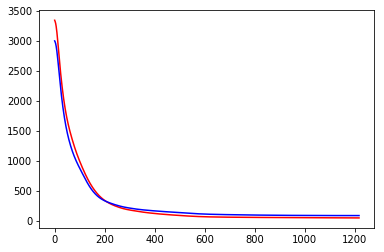

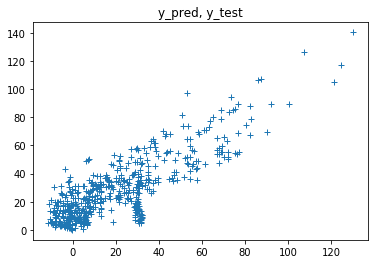

In [6]:
y_pred = model.predict(X_test)
plt.plot(history.history['loss'], 'r-')
plt.plot(history.history['val_loss'], 'b-')
plt.show()

plt.title('y_pred, y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.show()

In [7]:
model = lstm_model(16, X_train.shape[1:])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16)                1600      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,617
Trainable params: 1,617
Non-trainable params: 0
_________________________________________________________________


In [8]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=10000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1, shuffle=False)

Train on 1126 samples, validate on 563 samples
Epoch 1/10000
1126/1126 [==============================] - 1s - loss: 3352.0250 - val_loss: 3011.7821
Epoch 2/10000
1126/1126 [==============================] - 0s - loss: 3346.8103 - val_loss: 3007.3419
Epoch 3/10000
1126/1126 [==============================] - 0s - loss: 3341.3086 - val_loss: 3002.1910
Epoch 4/10000
1126/1126 [==============================] - 0s - loss: 3334.4286 - val_loss: 2995.6094
Epoch 5/10000
1126/1126 [==============================] - 0s - loss: 3325.1714 - val_loss: 2986.8170
Epoch 6/10000
1126/1126 [==============================] - 0s - loss: 3312.8553 - val_loss: 2975.4629
Epoch 7/10000
1126/1126 [==============================] - 0s - loss: 3297.0146 - val_loss: 2961.3365
Epoch 8/10000
1126/1126 [==============================] - 0s - loss: 3277.4252 - val_loss: 2944.1837
Epoch 9/10000
1126/1126 [==============================] - 0s - loss: 3254.4020 - val_loss: 2924.2579
Epoch 10/10000
1126/1126 [=========

1126/1126 [==============================] - 0s - loss: 1389.5835 - val_loss: 1229.4421
Epoch 81/10000
1126/1126 [==============================] - 0s - loss: 1377.9845 - val_loss: 1218.6713
Epoch 82/10000
1126/1126 [==============================] - 0s - loss: 1366.5065 - val_loss: 1208.1031
Epoch 83/10000
1126/1126 [==============================] - 0s - loss: 1355.1407 - val_loss: 1197.7317
Epoch 84/10000
1126/1126 [==============================] - 0s - loss: 1343.8723 - val_loss: 1187.5477
Epoch 85/10000
1126/1126 [==============================] - 0s - loss: 1332.6943 - val_loss: 1177.5627
Epoch 86/10000
1126/1126 [==============================] - 0s - loss: 1321.5948 - val_loss: 1167.7532
Epoch 87/10000
1126/1126 [==============================] - 0s - loss: 1310.5686 - val_loss: 1158.1010
Epoch 88/10000
1126/1126 [==============================] - 0s - loss: 1299.6116 - val_loss: 1148.6120
Epoch 89/10000
1126/1126 [==============================] - 0s - loss: 1288.7244 - val_l

1126/1126 [==============================] - 0s - loss: 695.7095 - val_loss: 629.2266
Epoch 161/10000
1126/1126 [==============================] - 0s - loss: 689.1613 - val_loss: 623.0008
Epoch 162/10000
1126/1126 [==============================] - 0s - loss: 682.6781 - val_loss: 616.8506
Epoch 163/10000
1126/1126 [==============================] - 0s - loss: 676.2559 - val_loss: 610.7648
Epoch 164/10000
1126/1126 [==============================] - 0s - loss: 669.8970 - val_loss: 604.7422
Epoch 165/10000
1126/1126 [==============================] - 0s - loss: 663.6021 - val_loss: 598.7897
Epoch 166/10000
1126/1126 [==============================] - 0s - loss: 657.3707 - val_loss: 592.9135
Epoch 167/10000
1126/1126 [==============================] - 0s - loss: 651.2020 - val_loss: 587.1115
Epoch 168/10000
1126/1126 [==============================] - 0s - loss: 645.0958 - val_loss: 581.3757
Epoch 169/10000
1126/1126 [==============================] - 0s - loss: 639.0554 - val_loss: 575.7

1126/1126 [==============================] - 0s - loss: 345.4981 - val_loss: 321.3777
Epoch 241/10000
1126/1126 [==============================] - 0s - loss: 342.7830 - val_loss: 319.2098
Epoch 242/10000
1126/1126 [==============================] - 0s - loss: 340.0936 - val_loss: 317.0664
Epoch 243/10000
1126/1126 [==============================] - 0s - loss: 337.4288 - val_loss: 314.9434
Epoch 244/10000
1126/1126 [==============================] - 0s - loss: 334.7904 - val_loss: 312.8537
Epoch 245/10000
1126/1126 [==============================] - 0s - loss: 332.1796 - val_loss: 310.7927
Epoch 246/10000
1126/1126 [==============================] - 0s - loss: 329.5940 - val_loss: 308.7525
Epoch 247/10000
1126/1126 [==============================] - 0s - loss: 327.0312 - val_loss: 306.7376
Epoch 248/10000
1126/1126 [==============================] - 0s - loss: 324.4955 - val_loss: 304.7498
Epoch 249/10000
1126/1126 [==============================] - 0s - loss: 321.9852 - val_loss: 302.7

1126/1126 [==============================] - 0s - loss: 191.4804 - val_loss: 201.6580
Epoch 321/10000
1126/1126 [==============================] - 0s - loss: 190.1644 - val_loss: 200.5815
Epoch 322/10000
1126/1126 [==============================] - 0s - loss: 188.8550 - val_loss: 199.5403
Epoch 323/10000
1126/1126 [==============================] - 0s - loss: 187.5564 - val_loss: 198.4640
Epoch 324/10000
1126/1126 [==============================] - 0s - loss: 186.2710 - val_loss: 197.4266
Epoch 325/10000
1126/1126 [==============================] - 0s - loss: 184.9952 - val_loss: 196.4134
Epoch 326/10000
1126/1126 [==============================] - 0s - loss: 183.7350 - val_loss: 195.3658
Epoch 327/10000
1126/1126 [==============================] - 0s - loss: 182.4827 - val_loss: 194.3731
Epoch 328/10000
1126/1126 [==============================] - 0s - loss: 181.2384 - val_loss: 193.3863
Epoch 329/10000
1126/1126 [==============================] - 0s - loss: 180.0034 - val_loss: 192.3

1126/1126 [==============================] - 0s - loss: 112.6599 - val_loss: 141.7480
Epoch 401/10000
1126/1126 [==============================] - 0s - loss: 111.9599 - val_loss: 141.2022
Epoch 402/10000
1126/1126 [==============================] - 0s - loss: 111.2598 - val_loss: 140.6828
Epoch 403/10000
1126/1126 [==============================] - 0s - loss: 110.5723 - val_loss: 140.1859
Epoch 404/10000
1126/1126 [==============================] - 0s - loss: 109.8853 - val_loss: 139.6535
Epoch 405/10000
1126/1126 [==============================] - 0s - loss: 109.2167 - val_loss: 139.1499
Epoch 406/10000
1126/1126 [==============================] - 0s - loss: 108.5448 - val_loss: 138.6603
Epoch 407/10000
1126/1126 [==============================] - 0s - loss: 107.8944 - val_loss: 138.1826
Epoch 408/10000
1126/1126 [==============================] - 0s - loss: 107.2391 - val_loss: 137.6993
Epoch 409/10000
1126/1126 [==============================] - 0s - loss: 106.5992 - val_loss: 137.2

1126/1126 [==============================] - 0s - loss: 73.4740 - val_loss: 109.8474
Epoch 482/10000
1126/1126 [==============================] - 0s - loss: 73.1564 - val_loss: 109.6110
Epoch 483/10000
1126/1126 [==============================] - 0s - loss: 72.8456 - val_loss: 109.2668
Epoch 484/10000
1126/1126 [==============================] - 0s - loss: 72.5322 - val_loss: 109.0237
Epoch 485/10000
1126/1126 [==============================] - 0s - loss: 72.2282 - val_loss: 108.6921
Epoch 486/10000
1126/1126 [==============================] - 0s - loss: 71.9241 - val_loss: 108.4506
Epoch 487/10000
1126/1126 [==============================] - 0s - loss: 71.6295 - val_loss: 108.1367
Epoch 488/10000
1126/1126 [==============================] - 0s - loss: 71.3376 - val_loss: 107.7995
Epoch 489/10000
1126/1126 [==============================] - 0s - loss: 71.0461 - val_loss: 107.6017
Epoch 490/10000
1126/1126 [==============================] - 0s - loss: 70.7606 - val_loss: 107.2733
Epoch 

1126/1126 [==============================] - 0s - loss: 56.7111 - val_loss: 93.4533
Epoch 563/10000
1126/1126 [==============================] - 0s - loss: 56.5859 - val_loss: 93.3100
Epoch 564/10000
1126/1126 [==============================] - 0s - loss: 56.4597 - val_loss: 93.2249
Epoch 565/10000
1126/1126 [==============================] - 0s - loss: 56.3375 - val_loss: 93.0904
Epoch 566/10000
1126/1126 [==============================] - 0s - loss: 56.2115 - val_loss: 93.0029
Epoch 567/10000
1126/1126 [==============================] - 0s - loss: 56.0918 - val_loss: 92.8708
Epoch 568/10000
1126/1126 [==============================] - 0s - loss: 55.9741 - val_loss: 92.8187
Epoch 569/10000
1126/1126 [==============================] - 0s - loss: 55.8549 - val_loss: 92.6745
Epoch 570/10000
1126/1126 [==============================] - 0s - loss: 55.7378 - val_loss: 92.5946
Epoch 571/10000
1126/1126 [==============================] - 0s - loss: 55.6234 - val_loss: 92.4603
Epoch 572/10000


1126/1126 [==============================] - 0s - loss: 49.7879 - val_loss: 85.8021
Epoch 645/10000
1126/1126 [==============================] - 0s - loss: 49.7311 - val_loss: 85.7419
Epoch 646/10000
1126/1126 [==============================] - 0s - loss: 49.6734 - val_loss: 85.6576
Epoch 647/10000
1126/1126 [==============================] - 0s - loss: 49.6186 - val_loss: 85.6055
Epoch 648/10000
1126/1126 [==============================] - 0s - loss: 49.5634 - val_loss: 85.5236
Epoch 649/10000
1126/1126 [==============================] - 0s - loss: 49.5063 - val_loss: 85.4681
Epoch 650/10000
1126/1126 [==============================] - 0s - loss: 49.4512 - val_loss: 85.3976
Epoch 651/10000
1126/1126 [==============================] - 0s - loss: 49.3961 - val_loss: 85.3143
Epoch 652/10000
1126/1126 [==============================] - 0s - loss: 49.3390 - val_loss: 85.2420
Epoch 653/10000
1126/1126 [==============================] - 0s - loss: 49.2852 - val_loss: 85.1578
Epoch 654/10000


1126/1126 [==============================] - 0s - loss: 46.0256 - val_loss: 80.3859
Epoch 727/10000
1126/1126 [==============================] - 0s - loss: 45.9914 - val_loss: 80.3502
Epoch 728/10000
1126/1126 [==============================] - 0s - loss: 45.9534 - val_loss: 80.2609
Epoch 729/10000
1126/1126 [==============================] - 0s - loss: 45.9190 - val_loss: 80.2199
Epoch 730/10000
1126/1126 [==============================] - 0s - loss: 45.8831 - val_loss: 80.1433
Epoch 731/10000
1126/1126 [==============================] - 0s - loss: 45.8480 - val_loss: 80.0889
Epoch 732/10000
1126/1126 [==============================] - 0s - loss: 45.8146 - val_loss: 80.0478
Epoch 733/10000
1126/1126 [==============================] - 0s - loss: 45.7780 - val_loss: 79.9736
Epoch 734/10000
1126/1126 [==============================] - 0s - loss: 45.7446 - val_loss: 79.8966
Epoch 735/10000
1126/1126 [==============================] - 0s - loss: 45.7129 - val_loss: 79.8506
Epoch 736/10000


1126/1126 [==============================] - 0s - loss: 43.5549 - val_loss: 76.2643
Epoch 809/10000
1126/1126 [==============================] - 0s - loss: 43.5282 - val_loss: 76.2084
Epoch 810/10000
1126/1126 [==============================] - 0s - loss: 43.5026 - val_loss: 76.1568
Epoch 811/10000
1126/1126 [==============================] - 0s - loss: 43.4764 - val_loss: 76.1528
Epoch 812/10000
1126/1126 [==============================] - 0s - loss: 43.4527 - val_loss: 76.0764
Epoch 813/10000
1126/1126 [==============================] - 0s - loss: 43.4281 - val_loss: 76.0678
Epoch 814/10000
1126/1126 [==============================] - 0s - loss: 43.4031 - val_loss: 76.0221
Epoch 815/10000
1126/1126 [==============================] - 0s - loss: 43.3761 - val_loss: 75.9835
Epoch 816/10000
1126/1126 [==============================] - 0s - loss: 43.3532 - val_loss: 75.9570
Epoch 817/10000
1126/1126 [==============================] - 0s - loss: 43.3266 - val_loss: 75.8969
Epoch 818/10000


1126/1126 [==============================] - 0s - loss: 41.5198 - val_loss: 73.8266
Epoch 891/10000
1126/1126 [==============================] - 0s - loss: 41.4944 - val_loss: 73.8086
Epoch 892/10000
1126/1126 [==============================] - 0s - loss: 41.4712 - val_loss: 73.7852
Epoch 893/10000
1126/1126 [==============================] - 0s - loss: 41.4468 - val_loss: 73.7606
Epoch 894/10000
1126/1126 [==============================] - 0s - loss: 41.4230 - val_loss: 73.7327
Epoch 895/10000
1126/1126 [==============================] - 0s - loss: 41.3996 - val_loss: 73.7258
Epoch 896/10000
1126/1126 [==============================] - 0s - loss: 41.3764 - val_loss: 73.7314
Epoch 897/10000
1126/1126 [==============================] - 0s - loss: 41.3496 - val_loss: 73.6755
Epoch 898/10000
1126/1126 [==============================] - 0s - loss: 41.3266 - val_loss: 73.6368
Epoch 899/10000
1126/1126 [==============================] - 0s - loss: 41.3042 - val_loss: 73.6442
Epoch 900/10000


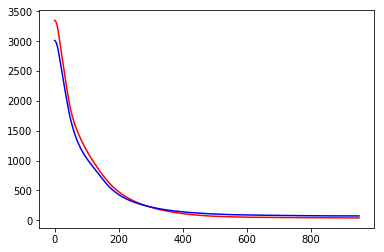

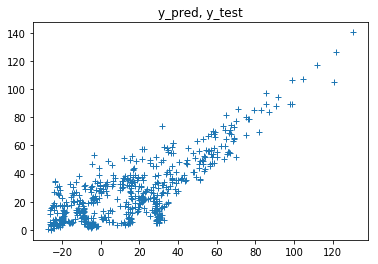

In [9]:
y_pred = model.predict(X_test)
plt.plot(history.history['loss'], 'r-')
plt.plot(history.history['val_loss'], 'b-')
plt.show()

plt.title('y_pred, y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.show()

In [10]:
model = gru_model(64, X_train.shape[1:])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 64)                14016     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 14,081
Trainable params: 14,081
Non-trainable params: 0
_________________________________________________________________


In [11]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=10000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1, shuffle=False)

Train on 1126 samples, validate on 563 samples
Epoch 1/10000
1126/1126 [==============================] - 1s - loss: 3343.3461 - val_loss: 2997.3667
Epoch 2/10000
1126/1126 [==============================] - 0s - loss: 3320.9483 - val_loss: 2975.7954
Epoch 3/10000
1126/1126 [==============================] - 0s - loss: 3288.5646 - val_loss: 2942.5239
Epoch 4/10000
1126/1126 [==============================] - 0s - loss: 3239.1245 - val_loss: 2893.5201
Epoch 5/10000
1126/1126 [==============================] - 0s - loss: 3169.2759 - val_loss: 2828.1762
Epoch 6/10000
1126/1126 [==============================] - 0s - loss: 3080.1790 - val_loss: 2749.1276
Epoch 7/10000
1126/1126 [==============================] - 0s - loss: 2975.6590 - val_loss: 2659.4752
Epoch 8/10000
1126/1126 [==============================] - 0s - loss: 2859.5146 - val_loss: 2561.9560
Epoch 9/10000
1126/1126 [==============================] - 0s - loss: 2735.2293 - val_loss: 2458.9356
Epoch 10/10000
1126/1126 [=========

1126/1126 [==============================] - 0s - loss: 166.7542 - val_loss: 215.3917
Epoch 82/10000
1126/1126 [==============================] - 0s - loss: 164.5900 - val_loss: 211.8539
Epoch 83/10000
1126/1126 [==============================] - 0s - loss: 162.4949 - val_loss: 208.3930
Epoch 84/10000
1126/1126 [==============================] - 0s - loss: 160.4527 - val_loss: 205.0132
Epoch 85/10000
1126/1126 [==============================] - 0s - loss: 158.4461 - val_loss: 201.6921
Epoch 86/10000
1126/1126 [==============================] - 0s - loss: 156.4608 - val_loss: 198.4286
Epoch 87/10000
1126/1126 [==============================] - 0s - loss: 154.4883 - val_loss: 195.2252
Epoch 88/10000
1126/1126 [==============================] - 0s - loss: 152.5252 - val_loss: 192.0754
Epoch 89/10000
1126/1126 [==============================] - 0s - loss: 150.5615 - val_loss: 188.9754
Epoch 90/10000
1126/1126 [==============================] - 0s - loss: 148.5868 - val_loss: 185.9268
Epoch

1126/1126 [==============================] - 0s - loss: 75.2084 - val_loss: 98.1006
Epoch 163/10000
1126/1126 [==============================] - 0s - loss: 74.9053 - val_loss: 97.7230
Epoch 164/10000
1126/1126 [==============================] - 0s - loss: 74.6084 - val_loss: 97.3441
Epoch 165/10000
1126/1126 [==============================] - 0s - loss: 74.3203 - val_loss: 96.9736
Epoch 166/10000
1126/1126 [==============================] - 0s - loss: 74.0427 - val_loss: 96.6183
Epoch 167/10000
1126/1126 [==============================] - 0s - loss: 73.7714 - val_loss: 96.2634
Epoch 168/10000
1126/1126 [==============================] - 0s - loss: 73.5069 - val_loss: 95.9376
Epoch 169/10000
1126/1126 [==============================] - 0s - loss: 73.2505 - val_loss: 95.6188
Epoch 170/10000
1126/1126 [==============================] - 0s - loss: 73.0016 - val_loss: 95.2876
Epoch 171/10000
1126/1126 [==============================] - 0s - loss: 72.7599 - val_loss: 94.9785
Epoch 172/10000


1126/1126 [==============================] - 0s - loss: 63.6497 - val_loss: 81.4305
Epoch 245/10000
1126/1126 [==============================] - 0s - loss: 63.5796 - val_loss: 81.3229
Epoch 246/10000
1126/1126 [==============================] - 0s - loss: 63.5108 - val_loss: 81.2135
Epoch 247/10000
1126/1126 [==============================] - 0s - loss: 63.4432 - val_loss: 81.1187
Epoch 248/10000
1126/1126 [==============================] - 0s - loss: 63.3756 - val_loss: 81.0029
Epoch 249/10000
1126/1126 [==============================] - 0s - loss: 63.3094 - val_loss: 80.9230
Epoch 250/10000
1126/1126 [==============================] - 0s - loss: 63.2422 - val_loss: 80.7995
Epoch 251/10000
1126/1126 [==============================] - 0s - loss: 63.1773 - val_loss: 80.7146
Epoch 252/10000
1126/1126 [==============================] - 0s - loss: 63.1131 - val_loss: 80.6305
Epoch 253/10000
1126/1126 [==============================] - 0s - loss: 63.0483 - val_loss: 80.5210
Epoch 254/10000


1126/1126 [==============================] - 0s - loss: 59.3414 - val_loss: 75.9093
Epoch 327/10000
1126/1126 [==============================] - 0s - loss: 59.2965 - val_loss: 75.8718
Epoch 328/10000
1126/1126 [==============================] - 0s - loss: 59.2514 - val_loss: 75.8031
Epoch 329/10000
1126/1126 [==============================] - 0s - loss: 59.2073 - val_loss: 75.7791
Epoch 330/10000
1126/1126 [==============================] - 0s - loss: 59.1605 - val_loss: 75.7180
Epoch 331/10000
1126/1126 [==============================] - 0s - loss: 59.1150 - val_loss: 75.6738
Epoch 332/10000
1126/1126 [==============================] - 0s - loss: 59.0690 - val_loss: 75.6321
Epoch 333/10000
1126/1126 [==============================] - 0s - loss: 59.0231 - val_loss: 75.5853
Epoch 334/10000
1126/1126 [==============================] - 0s - loss: 58.9748 - val_loss: 75.5130
Epoch 335/10000
1126/1126 [==============================] - 0s - loss: 58.9285 - val_loss: 75.4755
Epoch 336/10000


1126/1126 [==============================] - 0s - loss: 55.6288 - val_loss: 71.9735
Epoch 409/10000
1126/1126 [==============================] - 0s - loss: 55.5854 - val_loss: 71.9231
Epoch 410/10000
1126/1126 [==============================] - 0s - loss: 55.5426 - val_loss: 71.8861
Epoch 411/10000
1126/1126 [==============================] - 0s - loss: 55.4997 - val_loss: 71.8445
Epoch 412/10000
1126/1126 [==============================] - 0s - loss: 55.4564 - val_loss: 71.7962
Epoch 413/10000
1126/1126 [==============================] - 0s - loss: 55.4143 - val_loss: 71.7823
Epoch 414/10000
1126/1126 [==============================] - 0s - loss: 55.3706 - val_loss: 71.7254
Epoch 415/10000
1126/1126 [==============================] - 0s - loss: 55.3282 - val_loss: 71.6930
Epoch 416/10000
1126/1126 [==============================] - 0s - loss: 55.2845 - val_loss: 71.6508
Epoch 417/10000
1126/1126 [==============================] - 0s - loss: 55.2419 - val_loss: 71.6179
Epoch 418/10000


1126/1126 [==============================] - 0s - loss: 52.2383 - val_loss: 69.0354
Epoch 491/10000
1126/1126 [==============================] - 0s - loss: 52.2010 - val_loss: 69.0322
Epoch 492/10000
1126/1126 [==============================] - 0s - loss: 52.1616 - val_loss: 68.9958
Epoch 493/10000
1126/1126 [==============================] - 0s - loss: 52.1235 - val_loss: 68.9779
Epoch 494/10000
1126/1126 [==============================] - 0s - loss: 52.0853 - val_loss: 68.9663
Epoch 495/10000
1126/1126 [==============================] - 0s - loss: 52.0461 - val_loss: 68.9372
Epoch 496/10000
1126/1126 [==============================] - 0s - loss: 52.0086 - val_loss: 68.9287
Epoch 497/10000
1126/1126 [==============================] - 0s - loss: 51.9692 - val_loss: 68.8800
Epoch 498/10000
1126/1126 [==============================] - 0s - loss: 51.9320 - val_loss: 68.8773
Epoch 499/10000
1126/1126 [==============================] - 0s - loss: 51.8942 - val_loss: 68.8416
Epoch 500/10000


1126/1126 [==============================] - 0s - loss: 49.3163 - val_loss: 67.9947
Epoch 573/10000
1126/1126 [==============================] - 0s - loss: 49.2843 - val_loss: 68.0165
Epoch 574/10000
1126/1126 [==============================] - 0s - loss: 49.2502 - val_loss: 67.9974
Epoch 575/10000
1126/1126 [==============================] - 0s - loss: 49.2177 - val_loss: 68.0139
Epoch 576/10000
1126/1126 [==============================] - 0s - loss: 49.1837 - val_loss: 67.9916
Epoch 577/10000
1126/1126 [==============================] - 0s - loss: 49.1517 - val_loss: 68.0066
Epoch 578/10000
1126/1126 [==============================] - 0s - loss: 49.1170 - val_loss: 67.9944
Epoch 579/10000
1126/1126 [==============================] - 0s - loss: 49.0841 - val_loss: 68.0008
Epoch 580/10000
1126/1126 [==============================] - 0s - loss: 49.0504 - val_loss: 67.9805
Epoch 581/10000
1126/1126 [==============================] - 0s - loss: 49.0177 - val_loss: 67.9991
Epoch 582/10000


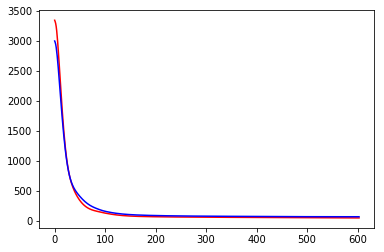

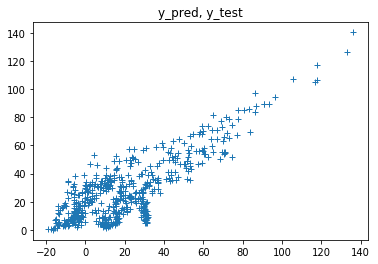

In [12]:
y_pred = model.predict(X_test)
plt.plot(history.history['loss'], 'r-')
plt.plot(history.history['val_loss'], 'b-')
plt.show()

plt.title('y_pred, y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.show()